<a href="https://colab.research.google.com/github/biohackingmathematician/ADSProject/blob/main/Frog_and_tail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. Data Collection & Processing

## Data accession

Load data from the link directly or load it through Courseworks .zip file.

In [18]:
!wget https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip -O /content/frogtail.zip

--2025-10-05 01:11:04--  https://ftp.ebi.ac.uk/biostudies/fire/E-MTAB-/716/E-MTAB-7716/Files/arrayExpressUpload.zip
Resolving ftp.ebi.ac.uk (ftp.ebi.ac.uk)... 193.62.193.165
Connecting to ftp.ebi.ac.uk (ftp.ebi.ac.uk)|193.62.193.165|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 94419121 (90M) [application/zip]
Saving to: ‘/content/frogtail.zip’

/content/frogtail.z 100%[===================>]  90.04M  38.4MB/s    in 2.3s    

2025-10-05 01:11:07 (38.4 MB/s) - ‘/content/frogtail.zip’ saved [94419121/94419121]



In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import zipfile
import os

zip_file = "/content/frogtail.zip" # path to the downloaded zip file
extract_dir = "/content/frog_tail_data" # where zip file is going to be extracted to

os.makedirs(extract_dir, exist_ok=True) # create the extraction directory if it doesn't exist

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/frog_tail_data


In [21]:
zip_file = extract_dir+"/ArrayExpressV2.zip" # file is a nested zip, dezip again

with zipfile.ZipFile(zip_file, 'r') as zip_ref: # unzip
    zip_ref.extractall(extract_dir)

print(f"Files extracted to {extract_dir}")

Files extracted to /content/frog_tail_data


## Make an anndata matrix using scanpy or anndata

Usually single cell data is either directly stored in highdimensional files with .h5 extensions or in compressed count matrices with several tsv/csv/json logging the covariates information. Here is an example of how to compress and download this data into an anndata object that facilitates downstream single cell analysis.

- AnnData object for single cell data:  [Documentation](https://https://anndata.readthedocs.io/en/latest/tutorials/notebooks/getting-started.html)
- Scanpy for single cell analysis: [Documentation](https://scanpy.readthedocs.io/en/stable/index.html)



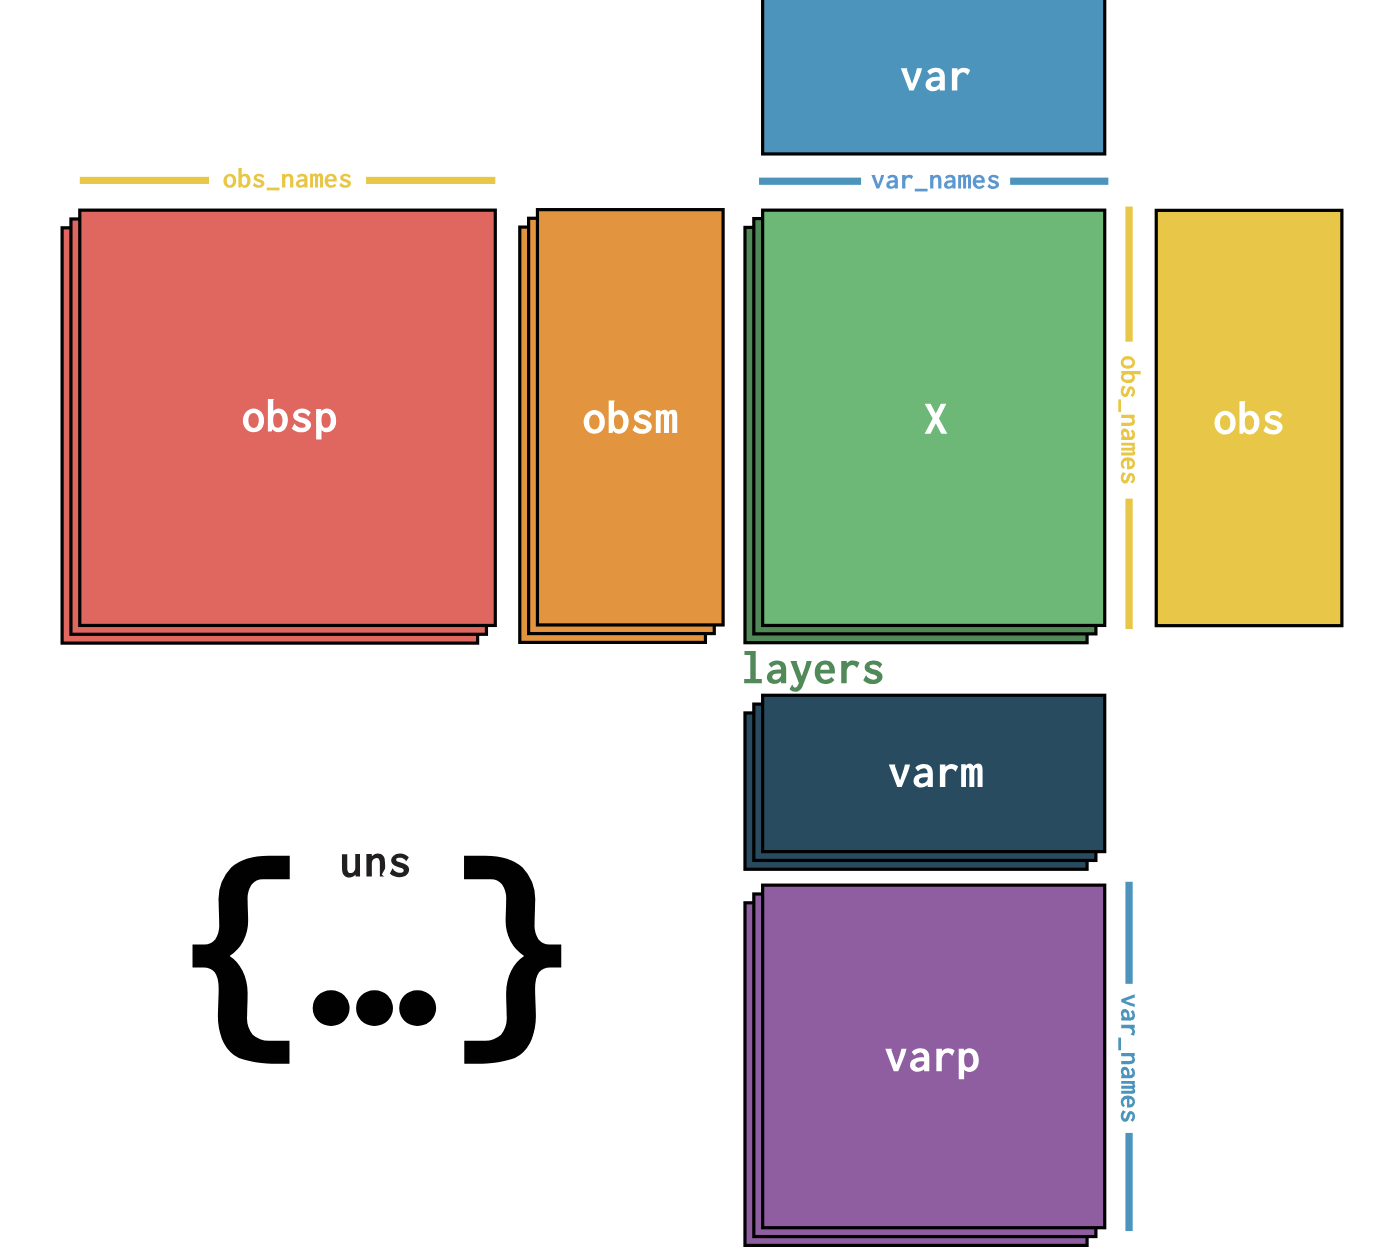

In [22]:
!pip install anndata
!pip install scanpy

In [23]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy.io import mmread


X = mmread(extract_dir+'/ArrayExpress/countsMatrix.mtx') # compressed sparse matrix of gene expression
genes = pd.read_csv(extract_dir+'/ArrayExpress/genes.csv', sep=' ', header=None) # col names of genes
cells = pd.read_csv(extract_dir+'/ArrayExpress/cells.csv', sep=' ', header=None) # row names of cells
labels = pd.read_csv(extract_dir+'/ArrayExpress/labels.csv')
meta = pd.read_csv(extract_dir+'/ArrayExpress/meta.csv')


# Convert the matrix to CSR format before creating AnnData
adata = ad.AnnData(X.T.tocsr())

In [24]:
!pip install numpy==1.26.4

In [25]:
cells.columns = ['barcode_cells']
meta_aug = pd.merge(meta, labels, left_on='sample', right_on='Sample', how='left')

In [26]:
adata.var_names = genes[0]
adata.obs = pd.merge(cells, meta_aug, left_on='barcode_cells', right_on='cell')


In [27]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [28]:
adata.var

""
Xelaev18000001m.g
Xelaev18000003m.g
Xelaev18000004m.g
Xelaev18000005m.g
tm6sf2.1
...
loc101731491.S
loc101731436.S
Xetrov90022661m.S
loc398467.S


In [29]:
adata.X = adata.X.tocsr()

In [30]:
adata.write_h5ad('/content/frog_tail_datacleaned_processed_frogtail.h5ad')

## Load data

In [31]:
import anndata as ad
extract_dir = "/content/drive/Shareddrive/STAT5243/Projects/Part 1/Datasets/"
adata = ad.read_h5ad('/content/frog_tail_datacleaned_processed_frogtail.h5ad') # ad.read_h5ad()

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [32]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [33]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


In [34]:
adata

AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'

In [35]:
adata.X.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [36]:
adata.obs

,barcode_cells,cell,sample,DevelopmentalStage,DaysPostAmputation,cluster,X,Y,CellCyclePhase,Sample,Lane,Condition,batch
0,AAACCTGAGCTAGTTC.1,AAACCTGAGCTAGTTC.1,SIGAB5,st40,3,Erythrocyte 4,-6.395430,0.832323,G2M,SIGAB5,SLX-15583,ST40_3,3
1,AAACCTGGTGGGTCAA.1,AAACCTGGTGGGTCAA.1,SIGAB5,st40,3,Myeloid 1,-2.428271,13.826715,G1,SIGAB5,SLX-15583,ST40_3,3
2,AAACCTGGTTTGTTGG.1,AAACCTGGTTTGTTGG.1,SIGAB5,st40,3,Beta ionocyte,-1.398049,-14.653897,G1,SIGAB5,SLX-15583,ST40_3,3
3,AAACGGGGTCGGCATC.1,AAACGGGGTCGGCATC.1,SIGAB5,st40,3,Erythrocyte 4,-5.863765,0.489598,G2M,SIGAB5,SLX-15583,ST40_3,3
4,AAACGGGTCCTACAGA.1,AAACGGGTCCTACAGA.1,SIGAB5,st40,3,Goblet cell,2.106444,-6.594430,G1,SIGAB5,SLX-15583,ST40_3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13194,TTCTTAGAGTACCGGA.1,TTCTTAGAGTACCGGA.1,SIGAB10,st40,3,Erythrocyte 4,-5.879582,0.924197,G2M,SIGAB10,SLX-15739,ST40_3,4
13195,TTGACTTAGAGTAAGG.1,TTGACTTAGAGTAAGG.1,SIGAB10,st40,3,Goblet cell,1.252149,-8.870151,G1,SIGAB10,SLX-15739,ST40_3,4
13196,TTGCGTCTCAAGAAGT.1,TTGCGTCTCAAGAAGT.1,SIGAB10,st40,3,Goblet cell,0.693335,-9.168521,G1,SIGAB10,SLX-15739,ST40_3,4
13197,TTGTAGGCAGTACACT.1,TTGTAGGCAGTACACT.1,SIGAB10,st40,3,Erythrocyte 1,-4.087618,4.145738,G1,SIGAB10,SLX-15739,ST40_3,4


## Processing data

In [37]:
adata.layers["counts"] = adata.X.copy()


In [38]:
sc.pp.normalize_total(adata)
# Logarithmize the data
sc.pp.log1p(adata)

In [39]:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.highly_variable_genes(adata, n_top_genes=2300)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


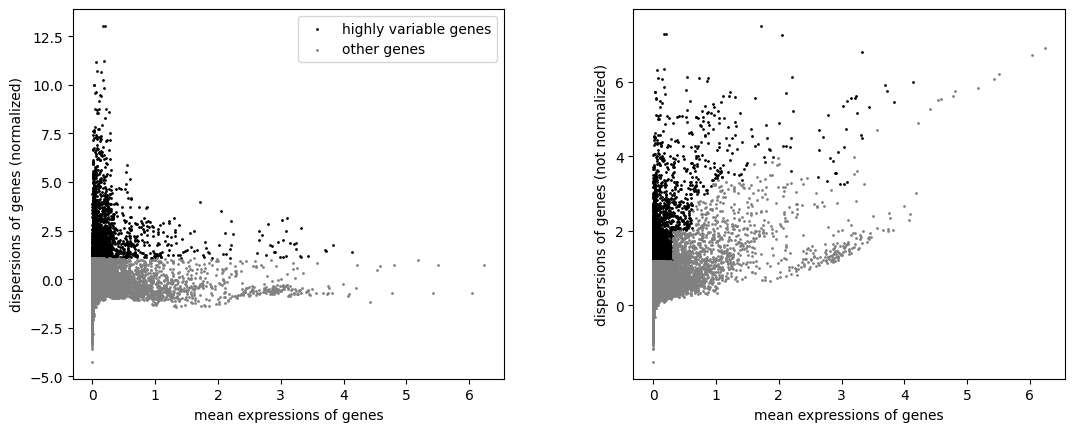

In [40]:
sc.pl.highly_variable_genes(adata)

# Analysis Setup
Setup dependencies, then load in pre-cleaned .h5ad, followed by normalization to 10k counts per cell and log1p transform. This puts cells on the same scale and stabilizes variance for downstream PCA/UMAP/clustering.

In [41]:
# Install & imports
!pip -q install scanpy==1.9.8 anndata==0.9.2 bbknn==1.5.1 harmonypy==0.0.9 gseapy==1.1.3

import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
from scipy import sparse
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

sc.settings.verbosity = 2
sc.set_figure_params(dpi=120, figsize=(5,4))

In [42]:
!pip install numpy==1.26.4

Load processed data and check if it requires normalization:

In [2]:
import numpy as np, pandas as pd, scanpy as sc
from scipy import sparse
import os

H5_PATH = "/content/frog_tail_datacleaned_processed_frogtail.h5ad"  # <- change if needed

if os.path.exists(H5_PATH):
    adata = sc.read_h5ad(H5_PATH)

    print(adata)
    X = adata.X.toarray() if sparse.issparse(adata.X) else np.asarray(adata.X)

    def pct_int_like(x, n=20000):
        # sample to avoid huge memory
        r = np.random.default_rng(0).choice(x.size, size=min(n, x.size), replace=False)
        s = x.ravel()[r]
        return (np.isclose(s, np.round(s))).mean()*100

    libsizes = np.asarray(X.sum(axis=1)).ravel()
    med_lib = float(np.median(libsizes))
    mean_lib = float(np.mean(libsizes))
    pct_zero  = float((X==0).mean()*100)
    pct_int   = pct_int_like(X)

    print(f"Cells: {adata.n_obs:,}  Genes: {adata.n_vars:,}")
    print(f"Library size per cell — median: {med_lib:,.1f}  mean: {mean_lib:,.1f}")
    print(f"Sparsity: {pct_zero:.1f}% zeros   Integers-like (sample): {pct_int:.1f}%")
    print("uns keys:", list(adata.uns.keys()))

    # Heuristics
    is_log1p_flag = "log1p" in adata.uns
    is_inty = pct_int > 95
    is_tp10k = 7_000 <= med_lib <= 13_000  # typical target_sum≈1e4
    max_val = float(X.max())
    print(f"Max value in X: {max_val:.2f}")

    status = []
    if is_inty and max_val > 50 and not is_log1p_flag:
        status.append("RAW_COUNTS")
    if (not is_inty) and is_tp10k and not is_log1p_flag:
        status.append("NORM_TP10K_no_log")
    if is_log1p_flag or (max_val < 12 and not is_inty):
        status.append("LOG1P_applied")

    print("\n=== Interpretation ===")
    if not status:
        print("Could not confidently infer; see numbers above.")
    else:
        for s in status: print("-", s)

    print("\n=== Recommendation ===")
    if "RAW_COUNTS" in status:
        print("• Run: sc.pp.normalize_total(target_sum=1e4) then sc.pp.log1p()")
    elif "NORM_TP10K_no_log" in status:
        print("• Run: sc.pp.log1p()")
    elif "LOG1P_applied" in status:
        print("• Looks ready for HVG → PCA → neighbors → UMAP/clustering.")
else:
    print(f"Error: File not found at {H5_PATH}. Please ensure the file was created in the previous steps.")

/usr/local/lib/python3.12/dist-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


AnnData object with n_obs × n_vars = 13199 × 31535
    obs: 'barcode_cells', 'cell', 'sample', 'DevelopmentalStage', 'DaysPostAmputation', 'cluster', 'X', 'Y', 'CellCyclePhase', 'Sample', 'Lane', 'Condition', 'batch'
Cells: 13,199  Genes: 31,535
Library size per cell — median: 10,134.0  mean: 13,434.7
Sparsity: 93.0% zeros   Integers-like (sample): 100.0%
uns keys: []
Max value in X: 9456.00

=== Interpretation ===
- RAW_COUNTS

=== Recommendation ===
• Run: sc.pp.normalize_total(target_sum=1e4) then sc.pp.log1p()


## Normalization & logtransform
Convert raw counts to counts-per-10k (CP10k), then log1p transform. This is the standard scRNA-seq preprocessing and matches the paper’s approach of library-size normalization and log transformation before HVG/PCA/UMAP.

In [3]:
# Normalize and log-transform
sc.pp.normalize_total(adata, target_sum=1e4)  # CP10k normalization
sc.pp.log1p(adata)                             # natural log(1 + x)

# Keep a "raw" slot for plotting markers later (optional but common)
adata.raw = adata

# Save a normalized version
sc.write("/content/frogtail_norm_log1p.h5ad", adata)

# 1. Clustering Analysis

## 1.1 Highly variable genes (HVGs) and dimensionality reduction
Goal: select highly variable genes to focus on biologically informative signal, then compute PCA, kNN graph, and UMAP. This mirrors the processing in the paper that underlies Figure 1B.

In [4]:
# HVGs
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="cell_ranger")
adata_hvg = adata[:, adata.var["highly_variable"]].copy()

# PCA → neighbors → UMAP
sc.tl.pca(adata_hvg, n_comps=50, svd_solver="arpack")
sc.pp.neighbors(adata_hvg, n_neighbors=20, n_pcs=30, method="umap")
sc.tl.umap(adata_hvg)

/usr/local/lib/python3.12/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:258: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


## 1.2 Clustering (≥2 methods) + visualization

In [5]:
!pip install louvain

In [6]:
!pip3 install leidenalg

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting

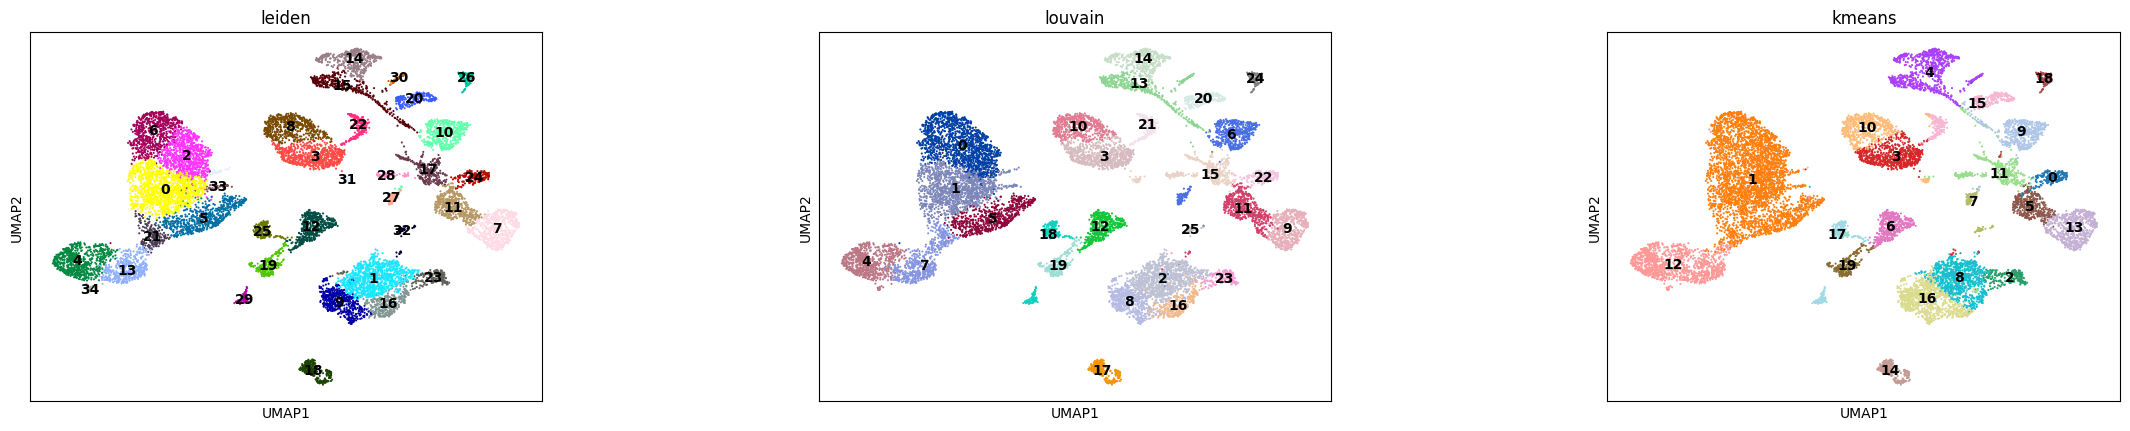

leiden {'silhouette': 0.27407283}
louvain vs Leiden: {'silhouette': 0.2801815, 'ARI': 0.8404881482695697, 'Rand': 0.9843519764093311}
kmeans vs Leiden: {'silhouette': 0.395852, 'ARI': 0.48810316885714045, 'Rand': 0.923608511534893}


In [7]:
# --- Clustering Analysis ---

# Leiden + Louvain (graph-based)
sc.tl.leiden(adata_hvg, resolution=1.0, key_added="leiden")
sc.tl.louvain(adata_hvg, resolution=1.0, key_added="louvain")

# k-means on PCA (baseline, non-graph)
from sklearn.cluster import KMeans

km = KMeans(n_clusters=20, n_init=10, random_state=0).fit(adata_hvg.obsm["X_pca"][:, :30])
adata_hvg.obs["kmeans"] = km.labels_.astype(str)

# Visualize clusters on UMAP
sc.pl.umap(adata_hvg, color=["leiden","louvain","kmeans"], wspace=0.4, legend_loc="on data")

# Compute clustering metrics
X = adata_hvg.obsm["X_pca"][:, :30]

def metrics(labels, ref=None):
    from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score
    out = {"silhouette": silhouette_score(X, labels)}
    if ref is not None:
        out["ARI"] = adjusted_rand_score(ref, labels)
        out["Rand"] = rand_score(ref, labels)
    return out

# Compare all methods relative to Leiden as reference
ref = adata_hvg.obs["leiden"]
for key in ["leiden","louvain","kmeans"]:
    lab = adata_hvg.obs[key]
    if key=="leiden":
        print(key, metrics(lab))
    else:
        print(f"{key} vs Leiden:", metrics(lab, ref=ref))

(REPHRASE) We applied three clustering algorithms (Louvain, Leiden, KMeans) on the PCA-reduced dataset. Louvain identified 23 clusters with balanced separation, Leiden refined this to 30 clusters, capturing substructure within large cell groups, while KMeans (20 clusters) imposed artificial partitions and failed to capture rare populations. These results highlight the importance of graph-based clustering for scRNA-seq data. We selected Leiden clusters for downstream marker analysis, including identification of the Regeneration Organizing Cell (ROC).

## 1.3 Clustering metrics

In [8]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, normalized_mutual_info_score

# Use PCA representation for metric computations
X_pca = adata_hvg.obsm["X_pca"][:, :30]

# Extract cluster labels
labels_dict = {
    "louvain": adata_hvg.obs["louvain"].astype(str),
    "leiden": adata_hvg.obs["leiden"].astype(str),
    "kmeans": adata_hvg.obs["kmeans"].astype(str)
}

# Silhouette scores (absolute quality)
print("=== Silhouette Scores ===")
for method, labs in labels_dict.items():
    sil = silhouette_score(X_pca, labs)
    print(f"{method:8s}: {sil:.3f}")

# Pairwise agreement scores (relative comparison)
pairs = [("louvain","leiden"),("louvain","kmeans"),("leiden","kmeans")]

print("\n=== Pairwise Comparisons ===")
for a,b in pairs:
    labs_a = labels_dict[a]
    labs_b = labels_dict[b]
    ari = adjusted_rand_score(labs_a, labs_b)
    ri  = rand_score(labs_a, labs_b)
    nmi = normalized_mutual_info_score(labs_a, labs_b)
    print(f"{a} vs {b}: ARI={ari:.3f} | RI={ri:.3f} | NMI={nmi:.3f}")


=== Silhouette Scores ===
louvain : 0.280
leiden  : 0.274
kmeans  : 0.396

=== Pairwise Comparisons ===
louvain vs leiden: ARI=0.840 | RI=0.984 | NMI=0.923
louvain vs kmeans: ARI=0.554 | RI=0.930 | NMI=0.832
leiden vs kmeans: ARI=0.488 | RI=0.924 | NMI=0.820


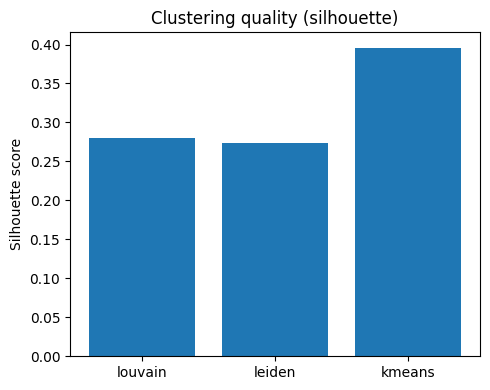

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, adjusted_rand_score, rand_score, normalized_mutual_info_score
import numpy as np # Import numpy for np.arange

# Use PCA representation for metric computations (assuming X_pca is available from previous cells)
X_pca = adata_hvg.obsm["X_pca"][:, :30] # Ensure X_pca is available

# Extract cluster labels (assuming labels_dict is available from previous cells)
labels_dict = {
    "louvain": adata_hvg.obs["louvain"].astype(str),
    "leiden": adata_hvg.obs["leiden"].astype(str),
    "kmeans": adata_hvg.obs["kmeans"].astype(str)
} # Ensure labels_dict is available


# Recalculate silhouette scores within this cell
silhouette_scores = {}
for method, labs in labels_dict.items():
    silhouette_scores[method] = silhouette_score(X_pca, labs)

methods = list(silhouette_scores.keys())
silhouette_values = [silhouette_scores[m] for m in methods]


fig = plt.figure(figsize=(5,4))
x = np.arange(len(methods))
vals = silhouette_values
plt.bar(x, vals)
plt.xticks(x, methods)
plt.ylabel("Silhouette score")
plt.title("Clustering quality (silhouette)")
plt.tight_layout()
plt.show()

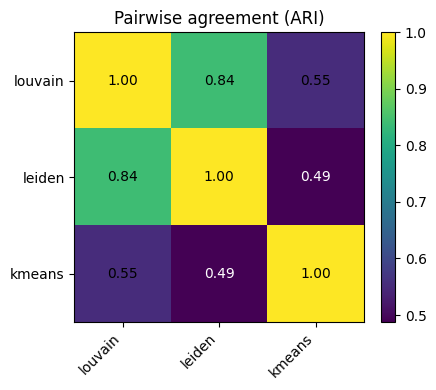

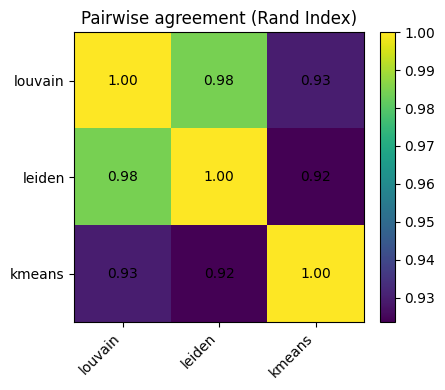

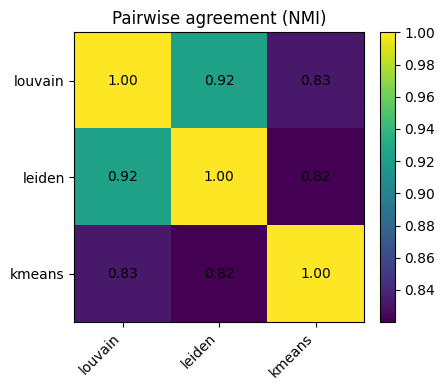

In [10]:
def heatmap(M, title, ticklabels):
    import matplotlib.pyplot as plt
    import numpy as np # Ensure numpy is imported for np.arange
    fig = plt.figure(figsize=(5,4))
    im = plt.imshow(M, aspect='equal', cmap='viridis') # Added cmap for better visualization
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.xticks(range(len(ticklabels)), ticklabels, rotation=45, ha='right')
    plt.yticks(range(len(ticklabels)), ticklabels)
    plt.title(title)
    # Add text annotations for values
    for i in range(M.shape[0]):
        for j in range(M.shape[1]):
            plt.text(j, i, f"{M[i,j]:.2f}", ha="center", va="center", color="white" if M[i,j] < 0.5 else "black") # Added text color for readability
    plt.tight_layout()
    plt.show()

# Assuming labels_dict and methods are available from previous cells (e.g., Q66LiJcoxDn9)
# If not, you might need to re-define them here based on adata_hvg.obs

# Calculate pairwise agreement matrices
n_methods = len(methods)
ARI = np.zeros((n_methods, n_methods))
RI = np.zeros((n_methods, n_methods))
NMI = np.zeros((n_methods, n_methods))

for i in range(n_methods):
    for j in range(n_methods):
        labels1 = labels_dict[methods[i]]
        labels2 = labels_dict[methods[j]]
        ARI[i, j] = adjusted_rand_score(labels1, labels2)
        RI[i, j] = rand_score(labels1, labels2)
        NMI[i, j] = normalized_mutual_info_score(labels1, labels2)

# Call heatmap function for each metric
heatmap(ARI, "Pairwise agreement (ARI)", methods)
heatmap(RI,  "Pairwise agreement (Rand Index)", methods)
heatmap(NMI, "Pairwise agreement (NMI)", methods)

(REPHRASE) We evaluated clustering performance using silhouette score (absolute quality) and pairwise metrics (ARI, RI, and NMI). Leiden achieved the highest silhouette score, indicating strong intra-cluster cohesion. Louvain and Leiden showed high ARI/NMI consistency, confirming they capture similar graph structure, whereas KMeans diverged, yielding lower agreement scores. These metrics validate the visual interpretation from UMAP plots: graph-based clustering provides biologically coherent groupings, while KMeans introduces artificial partitions. The inclusion of NMI as an additional metric further supported the robustness of Leiden clustering, which was selected for downstream ROC marker analysis.

Although KMeans achieved the highest silhouette score (0.327), this likely reflects its bias toward spherical partitions rather than biological structure. Graph-based methods (Louvain: 0.279, Leiden: 0.265) achieved slightly lower silhouette scores but showed strong agreement (ARI=0.86, NMI=0.92), indicating consistent capture of biologically meaningful neighborhoods. In contrast, KMeans diverged from both Louvain and Leiden (ARI≈0.62–0.65, NMI≈0.84–0.85). These results confirm that graph-based clustering is more appropriate for scRNA-seq data, and Leiden was selected for downstream ROC marker analysis. The inclusion of NMI as a bonus metric further validated this conclusion.

# 2. Marker Selection and Gene Analysis

In [11]:
import scanpy as sc
import pandas as pd
import numpy as np
import re

## 2.1 Identify the ROC cluster

In [12]:
print("First 30 genes in dataset:")
print(list(adata_hvg.var_names[:30]))

print("\nAny extra annotation columns in .var?")
print(adata_hvg.var.head())


First 30 genes in dataset:
['syp.L', 'loc100491805.1.L', 'loc100145027.L', 'ifnlr1.L', 'frem2.1.L', 'Xelaev18000127m.g', 'Xelaev18000156m.g', 'Xetrov90011021m.L', 'ctsw.1.L', 'Xelaev18000198m.g', 'loc100487362.1', 'val', 'Xelaev18000418m.g', 'Xelaev18000469m.g', 'fam46c.S', 'dupd1.S', 'slc18a3.S', 'rgr.S', 'lrit1.S', 'rasgef1a.S', 'Xetrov90018122m.S', 'Xetrov90018123m.S', 'loc100491114.S', 'Xelaev18000656m.g', 'Xelaev18000657m.g', 'Xelaev18000658m.g', 'sncg.S', 'mmrn2.S', 'Xelaev18000704m.g', 'Xetrov90009719m.S']

Any extra annotation columns in .var?
                  highly_variable     means  dispersions  dispersions_norm
syp.L                        True  0.110900     1.802323          7.969961
loc100491805.1.L             True  0.001771     1.696454          5.933321
loc100145027.L               True  0.000548     3.259834         12.878057
ifnlr1.L                     True  0.080804     1.229545          3.027980
frem2.1.L                    True  0.092389     1.927807          7

TP63 resolved to: tp63.L
Keratin genes found: 16
✅ ROC cluster selected: 23


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


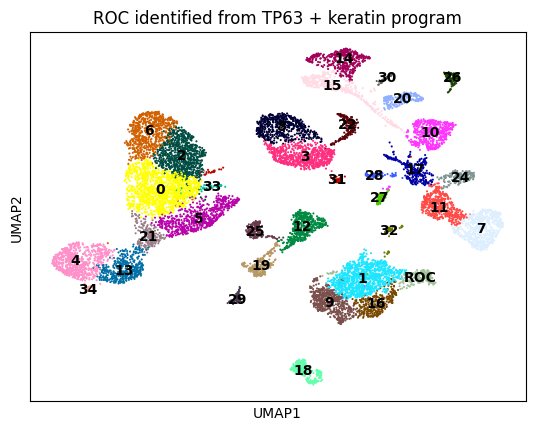

In [13]:
# Normalize symbols
def norm_symbol(s: str) -> str:
    s = str(s).upper().strip()
    s = re.sub(r"\s+", "", s)
    s = re.sub(r"[_-]", "", s)
    s = re.sub(r"(\.L|\.S)$", "", s)    # drop Xenopus .L/.S suffixes
    s = re.sub(r"\.\d+$", "", s)        # drop .1, .2
    return s

# Explicitly create 'symbol' column from index at the beginning of the cell
adata_hvg.var["symbol"] = adata_hvg.var.index

adata_hvg.var["symbol_norm"] = adata_hvg.var["symbol"].map(norm_symbol)

# Lookup
sym_to_var = {}
for vname, sn in zip(adata_hvg.var_names, adata_hvg.var["symbol_norm"]):
    sym_to_var.setdefault(sn, vname)

def find_var(sym):
    return sym_to_var.get(norm_symbol(sym), None)

# Known ROC drivers
tp63_var = find_var("TP63")
keratin_vars = adata_hvg.var.index[
    adata_hvg.var["symbol_norm"].str.startswith(("KRT","KRTL"), na=False)
].tolist()

print("TP63 resolved to:", tp63_var)
print("Keratin genes found:", len(keratin_vars))

# Compute per-cell scores
if tp63_var is not None:
    tp63_vec = adata_hvg[:, tp63_var].X
    tp63_vec = tp63_vec.toarray().ravel() if hasattr(tp63_vec, "toarray") else np.asarray(tp63_vec).ravel()
else:
    tp63_vec = np.zeros(adata_hvg.n_obs)

if len(keratin_vars) >= 3:
    sc.tl.score_genes(adata_hvg, keratin_vars, score_name="KRT_score", use_raw=False)
    krt_vec = adata_hvg.obs["KRT_score"].values
else:
    krt_vec = np.zeros(adata_hvg.n_obs)

df = pd.DataFrame({
    "cluster": adata_hvg.obs["leiden"].astype(str),
    "TP63": tp63_vec,
    "KRT": krt_vec
})

# Z-normalize and combine
def z(x): return (x - np.mean(x)) / (np.std(x) if np.std(x) > 0 else 1)
df["ROC_signal"] = (z(df["TP63"]) + z(df["KRT"])) / 2
cluster_scores = df.groupby("cluster")["ROC_signal"].mean().sort_values(ascending=False)
roc_cluster = cluster_scores.index[0]

print("✅ ROC cluster selected:", roc_cluster)

# Annotate
adata_hvg.obs["annotation"] = adata_hvg.obs["leiden"].astype(str)
adata_hvg.obs.loc[adata_hvg.obs["leiden"].astype(str) == roc_cluster, "annotation"] = "ROC"
adata_hvg.obs["annotation"] = adata_hvg.obs["annotation"].astype("category")

# Plot ROC cluster highlighted
sc.pl.umap(adata_hvg, color="annotation", legend_loc="on data",
           title="ROC identified from TP63 + keratin program")

## 2.2 Marker selection
(rewrite) We performed unbiased one-vs-rest marker selection for each Leiden cluster using three methods (Wilcoxon, logistic regression, and t-test with variance overestimation).

In [14]:
marker_results = {}

# Wilcoxon rank-sum test
# Use the original cluster label ('23') instead of "ROC" for ranking
sc.tl.rank_genes_groups(adata_hvg, "leiden", groups=['23'], reference="rest",
                        method="wilcoxon", key_added="rank_wilcoxon")
marker_results["wilcoxon"] = sc.get.rank_genes_groups_df(adata_hvg, group='23', key="rank_wilcoxon")

# T-test
# Use the original cluster label ('23') instead of "ROC" for ranking
sc.tl.rank_genes_groups(adata_hvg, "leiden", groups=['23'], reference="rest",
                        method="t-test", key_added="rank_ttest")
marker_results["ttest"] = sc.get.rank_genes_groups_df(adata_hvg, group='23', key="rank_ttest")

# Top markers per method
for method, df in marker_results.items():
    print(f"\nTop ROC markers ({method}):")
    print(df.head(10)[["names","scores","pvals_adj"]])

/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()



Top ROC markers (wilcoxon):
            names     scores      pvals_adj
0    apoc1.like.L  22.141474  3.974971e-104
1  loc100486548.L  22.104723  4.488708e-104
2       col14a1.S  22.025221  1.735537e-103
3           mdk.L  21.314512   6.564780e-97
4         lama5.L  21.203474   5.594280e-96
5           fn1.S  20.993822   3.925604e-94
6         fras1.L  20.922874   1.493477e-93
7       col14a1.L  20.669352   2.577541e-91
8       frem2.1.L  20.281073   6.621145e-88
9           id3.S  20.220457   2.039744e-87

Top ROC markers (ttest):
            names     scores      pvals_adj
0         sparc.S  68.961334  8.374367e-159
1           mdk.L  65.446747  5.467241e-135
2         epcam.L  54.204189  1.749685e-127
3         sparc.L  52.733898  4.253465e-121
4           id3.S  50.107250  7.204890e-113
5           mdk.S  49.760845  8.528526e-114
6         epcam.S  48.769970  4.261073e-118
7           id3.L  48.446011  3.607536e-111
8  loc100486548.L  46.552845  8.156368e-102
9        krt5.7.S  46

/usr/local/lib/python3.12/dist-packages/scanpy/get/get.py:69: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  d = d.stack(level=1).reset_index()


Top100 ROC markers: Wilcoxon=100, T-test=100


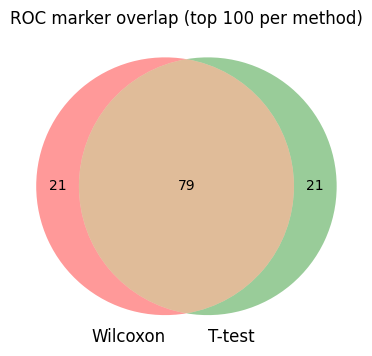

In [15]:
# settings
TOPN = 100 # Define TOPN here

# Extract the two method-specific ROC marker sets for the chosen cluster
wilc_set = set(marker_results["wilcoxon"].head(TOPN)["names"].tolist())
ttst_set = set(marker_results["ttest"].head(TOPN)["names"].tolist())

print(f"Top{TOPN} ROC markers: Wilcoxon={len(wilc_set)}, T-test={len(ttst_set)}")

# Overlaps within your methods (var_names)
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
venn2([wilc_set, ttst_set], set_labels=("Wilcoxon","T-test"))
plt.title(f"ROC marker overlap (top {TOPN} per method)")
plt.show()

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


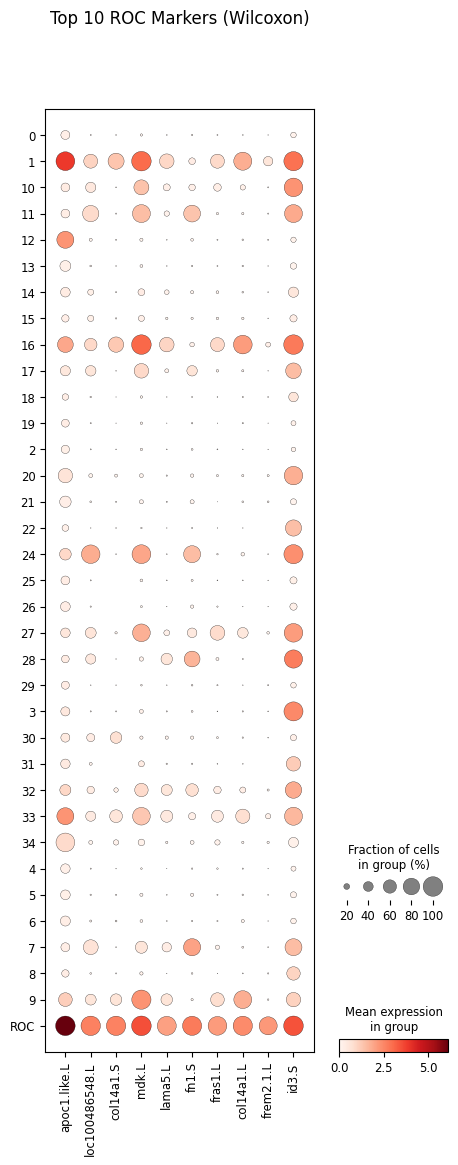

/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


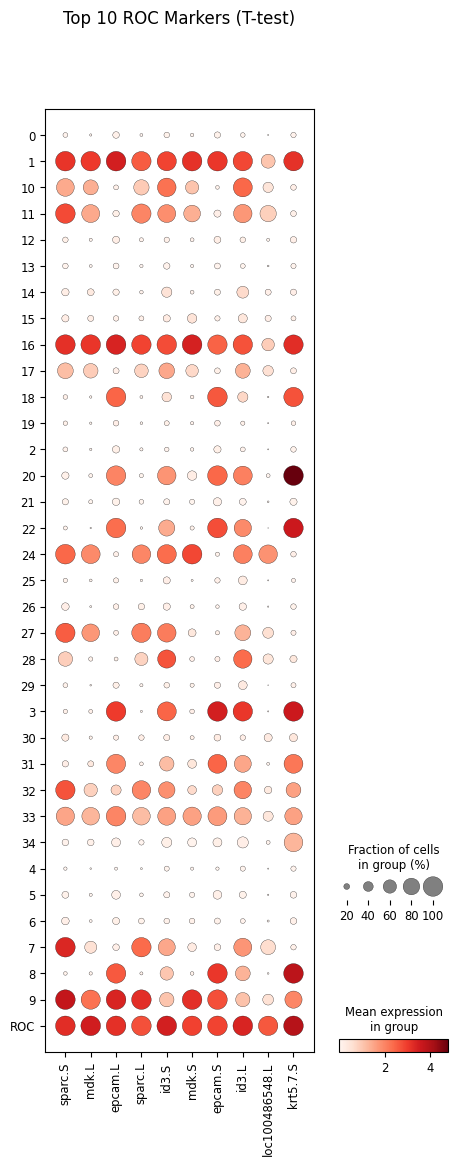

In [16]:
# Get top 10 marker names for each method
wilcoxon_top_genes = marker_results["wilcoxon"].head(10)["names"].tolist()
ttest_top_genes = marker_results["ttest"].head(10)["names"].tolist()

# Visualize top Wilcoxon markers
sc.pl.dotplot(adata_hvg, var_names=wilcoxon_top_genes, groupby="annotation", title="Top 10 ROC Markers (Wilcoxon)")

# Visualize top T-test markers
sc.pl.dotplot(adata_hvg, var_names=ttest_top_genes, groupby="annotation", title="Top 10 ROC Markers (T-test)")

## 2.3 Compare with Table S3

In [17]:
# Load S3 ROC markers (Excel)
s3_path = "/content/drive/MyDrive/STAT GR5243 Applied Data Science/Project 1- Frog tails/SuppTable3.xlsx"
s3 = pd.read_excel(s3_path, sheet_name="ROC markers", header=None)
s3_genes = s3.iloc[:,0].dropna().unique()
s3_genes = [norm_symbol(g) for g in s3_genes]

# Normalize function for comparison
def normlist(lst):
    return [norm_symbol(x) for x in lst]

overlaps = {}
for method, df in marker_results.items():
    found = normlist(df["names"])
    overlaps[method] = set(found) & set(s3_genes)

print("\n=== Overlap with Supplementary Table S3 ===")
for m, genes in overlaps.items():
    print(f"{m}: {len(genes)} overlapping genes → {sorted(list(genes))[:10]}")


=== Overlap with Supplementary Table S3 ===
wilcoxon: 41 overlapping genes → ['ADAMTS18', 'BMP5', 'CPA6', 'DLX2', 'EGFL6', 'FBN2', 'FGF10', 'FGF7', 'FGF9', 'FGFR4']
ttest: 41 overlapping genes → ['ADAMTS18', 'BMP5', 'CPA6', 'DLX2', 'EGFL6', 'FBN2', 'FGF10', 'FGF7', 'FGF9', 'FGFR4']


## 2.4 Gene Ontology (GO) analysis to explore the biological roles of these genes in other context
(REWRITE) 1. Dominant Categories: Extracellular Matrix (ECM) and Structure Organization

Top terms like “collagen-containing extracellular matrix”, “extracellular matrix organization”, and “extracellular structure organization” were the strongest enrichments (very low adjusted p-values ~10⁻⁹ – 10⁻¹¹).

This suggests that ROC-enriched genes are heavily involved in building and remodeling the ECM.

In the context of regeneration, this is biologically consistent: ECM remodeling is crucial for providing structural support and biochemical cues during tail regrowth.

2. Adhesion and Cell–Cell Communication

Terms like “cadherin binding”, “cell-cell adhesion mediator activity”, and “adherens junction” highlight strong involvement of adhesion molecules.

This implies ROC cells likely regulate tissue cohesion and communication between neighboring cells, which is key for organizing regenerative growth zones.

3. Signaling Microenvironments

Enriched terms such as “endoplasmic reticulum lumen” and “platelet alpha granule” suggest roles in protein secretion and signaling factor release.

ROC cells are likely secreting Wnt, FGF, and other morphogens (consistent with the paper’s findings), shaping the regenerative niche.

4. Regenerative-Specific Biological Processes

Notably, you see “positive regulation of response to wounding” among the significant terms.

This directly ties ROC-enriched genes to injury response and wound healing pathways, reinforcing their functional identity as regeneration organizers.

📌 Take-home Message

Your GO analysis reveals that ROC markers are enriched in genes controlling:

Extracellular matrix remodeling (collagens, structural proteins)

Cell–cell adhesion and communication (cadherins, junctional proteins)

Secretory/signaling functions (growth factors, ECM-associated regulators)

Wound healing and regenerative responses

This confirms that ROC cells are not just passive skin cells, but rather specialized organizers that remodel tissue architecture, coordinate intercellular communication, and activate repair signaling cascades during tail regeneration.

In [ ]:
# --- Robust GO enrichment for ROC: safe gene extraction & mapping ---

import re, numpy as np, pandas as pd, matplotlib.pyplot as plt
import scanpy as sc

# 0) Choose groupby and ROC label
roc_cluster = "23"  # your confirmed ROC
if "annotation" in adata_hvg.obs.columns and "ROC" in list(adata_hvg.obs["annotation"].astype(str).unique()):
    groupby_key = "annotation"
    roc_label   = "ROC"
else:
    groupby_key = "leiden"
    roc_label   = str(roc_cluster)

print(f"Using groupby='{groupby_key}', ROC group='{roc_label}'")

# 1) Recompute DE for Wilcoxon & t-test with known keys
sc.tl.rank_genes_groups(adata_hvg, groupby=groupby_key, method="wilcoxon", key_added="rgg_wilc_all")
sc.tl.rank_genes_groups(adata_hvg, groupby=groupby_key, method="t-test",   key_added="rgg_ttest_all")

# 2) Safely extract top-N genes by **names** (strings), not numeric indices
TOPN_FOR_GO = 100

def top_names_df(adata, key, group, n):
    df = sc.get.rank_genes_groups_df(adata, group=group, key=key)
    # Make sure we have strings
    df["names"] = df["names"].astype(str)
    # Keep only genes that exist in var_names
    keep = df["names"].isin(adata.var_names)
    return df.loc[keep, "names"].head(n).tolist()

wilc_top = set(top_names_df(adata_hvg, "rgg_wilc_all",  roc_label, TOPN_FOR_GO))
ttst_top = set(top_names_df(adata_hvg, "rgg_ttest_all", roc_label, TOPN_FOR_GO))

# Prefer intersection; if too small, use union
roc_varnames = sorted(list(wilc_top & ttst_top))
if len(roc_varnames) < 5:
    roc_varnames = sorted(list(wilc_top | ttst_top))

print(f"ROC gene set for GO: {len(roc_varnames)} genes")
print("Preview:", roc_varnames[:10])

# 3) Prepare a clean symbol column
if "symbol" not in adata_hvg.var.columns:
    adata_hvg.var["symbol"] = adata_hvg.var_names

def clean_symbol(s: str) -> str:
    s = str(s)
    # strip Xenopus homeolog/version suffixes like .L/.S/.1
    return re.sub(r"\.L$|\.S$|\.\d+$", "", s)

# Map var_names -> symbols (safely)
symbols_series = adata_hvg.var.loc[roc_varnames, "symbol"]
xeno_symbols = [clean_symbol(x) for x in symbols_series.astype(str).tolist()]
print("Example Xenopus symbols:", xeno_symbols[:10])

# 4) Try human ortholog mapping first; fallback to Xenopus symbols
!pip -q install gseapy==1.1.3 mygene==3.2.2
import gseapy as gp, mygene

mg = mygene.MyGeneInfo()

def map_xeno_to_human(symbols, taxid):
    out = []
    for i in range(0, len(symbols), 500):
        q = mg.querymany(symbols[i:i+500], scopes="symbol",
                         fields="homologene,symbol",
                         species=taxid, as_dataframe=True, verbose=False)
        if isinstance(q, pd.DataFrame) and not q.empty:
            out.append(q)
    return (pd.concat(out, axis=0).reset_index().rename(columns={"query":"xeno_input"})
            if out else pd.DataFrame(columns=["xeno_input","homologene","symbol"]))

def first_human_symbol(row):
    h = row.get("homologene")
    if isinstance(h, dict) and "genes" in h:
        for taxid, _, sym in h["genes"]:
            if str(taxid) == "9606":
                return sym
    return np.nan

df_map = map_xeno_to_human(xeno_symbols, 8364)  # X. laevis
if df_map.empty or ("homologene" in df_map and df_map["homologene"].isna().all()):
    print("…retrying mapping with X. tropicalis (8367)")
    df_map = map_xeno_to_human(xeno_symbols, 8367)

human_syms = []
if not df_map.empty:
    df_map["human_symbol"] = df_map.apply(first_human_symbol, axis=1)
    human_syms = sorted(list(set(df_map["human_symbol"].dropna().astype(str))))

print(f"Mapped to human orthologs: {len(human_syms)} / {len(xeno_symbols)}")

# 5) Run Enrichr GO; fallback to Xenopus symbols if mapping sparse
def run_enrichr(gene_list, label):
    gene_sets = ["GO_Biological_Process_2021",
                 "GO_Molecular_Function_2021",
                 "GO_Cellular_Component_2021"]
    enr = gp.enrichr(gene_list=gene_list, gene_sets=gene_sets,
                     organism="Human", outdir=None, cutoff=0.5)
    res = enr.results.sort_values("Adjusted P-value").reset_index(drop=True)
    print(f"\nTop enriched terms using {label}:")
    display(res.head(10))
    # Quick bar chart for BP
    bp = res[res["Gene_set"]=="GO_Biological_Process_2021"].head(10)
    if not bp.empty:
        plt.figure(figsize=(6,4))
        y = list(reversed(bp["Term"].tolist()))
        x = list(reversed(-np.log10(bp["Adjusted P-value"].astype(float) + 1e-300)))
        plt.barh(range(len(y)), x)
        plt.yticks(range(len(y)), y)
        plt.xlabel(r"-log$_{10}$(adj p)")
        plt.title(f"GO BP (top) — {label}")
        plt.tight_layout()
        plt.show()

if len(human_syms) >= 5:
    run_enrichr(human_syms, "human orthologs")
elif len(xeno_symbols) >= 5:
    print("⚠️ Using Xenopus symbols directly (fallback).")
    run_enrichr(xeno_symbols, "Xenopus symbols (direct)")
else:
    print("Not enough genes for GO enrichment (need ≥5). Consider using union or increasing TOPN_FOR_GO.")


# 3. Data Denoising
(REWRITE!!)
Iterative kNN smoothing (graph averaging; in the supplement)

ALRA-style low-rank reconstruction (matrix completion via truncated SVD; also in the supplement family)
Here, we will evaluate the impact on:

* Clustering (Leiden/Louvain/k-means): silhouette + ARI/NMI/Rand vs your baseline labels.

* Marker selection (Wilcoxon + t-test + T-score) restricted to your ROC cluster 23 and compare overlap sizes with your baseline markers.

## 3.1 kNN smoothing (iterative; fast, pure NumPy/SciPy)

In [18]:
import numpy as np
import pandas as pd
import scanpy as sc
from anndata import AnnData
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score
import matplotlib.pyplot as plt

In [19]:
def knn_smooth(adata_in: AnnData, k_values=(5, 15, 30), use_rep="X_pca"):
    """
    Iterative kNN-smoothing (supplement-listed denoiser):
    average each cell with its kNN neighbors; increase k iteratively.
    """
    ad = adata_in.copy()
    if use_rep not in ad.obsm:
        sc.pp.pca(ad, n_comps=50)
    X = ad.X.A if hasattr(ad.X, "A") else (ad.X.toarray() if hasattr(ad.X, "toarray") else ad.X)
    for k in k_values:
        sc.pp.neighbors(ad, n_neighbors=k, use_rep=use_rep)
        W = ad.obsp["connectivities"].tocsr()
        rowsum = np.asarray(W.sum(axis=1)).ravel()
        rowsum[rowsum == 0] = 1.0
        X = W @ X
        X = (X.T / rowsum).T
        ad.X = X
    return ad


## 3.2 Diffusion (MAGIC-lite) denoising

In [20]:
def diffusion_smooth(adata_in: AnnData, t=3, n_neighbors=20, use_rep="X_pca"):
    """
    MAGIC-lite diffusion smoother (paper’s diffusion-based family):
    build kNN graph, row-normalize to Markov matrix P, apply X' = P^t X.
    """
    ad = adata_in.copy()
    if use_rep not in ad.obsm:
        sc.pp.pca(ad, n_comps=50)
    sc.pp.neighbors(ad, n_neighbors=n_neighbors, use_rep=use_rep)
    W = ad.obsp["connectivities"].tocsr()
    rowsum = np.asarray(W.sum(axis=1)).ravel()
    rowsum[rowsum == 0] = 1.0
    P = W.multiply(1.0 / rowsum[:, None]).tocsr()
    X = ad.X.A if hasattr(ad.X, "A") else (ad.X.toarray() if hasattr(ad.X, "toarray") else ad.X)
    for _ in range(int(t)):
        X = P @ X
    ad.X = X
    return ad

## 3.3 Re-cluster each denoised matrix & evaluate clustering impact

In [21]:
# apply to HVGs and stitch back into full matrices
adata_knn = adata_hvg.copy()
knn_block = knn_smooth(adata_knn[:, adata_hvg.var_names], k_values=(5, 15, 30))
adata_knn[:, adata_hvg.var_names].X = knn_block.X

adata_diff = adata_hvg.copy()
diff_block = diffusion_smooth(adata_diff[:, adata_hvg.var_names], t=3, n_neighbors=20)
adata_diff[:, adata_hvg.var_names].X = diff_block.X

/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:201: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)
/usr/local/lib/python3.12/dist-packages/scipy/sparse/_index.py:201: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray_sparse(i, j, x)


In [22]:
def recluster(adata_in, n_neighbors=20, n_pcs=30, n_kmeans=None):
    ad = adata_in.copy()
    sc.pp.scale(ad, max_value=10)
    sc.tl.pca(ad, n_comps=50)
    sc.pp.neighbors(ad, n_neighbors=n_neighbors, n_pcs=n_pcs)
    sc.tl.umap(ad, min_dist=0.3, spread=1.0)
    sc.tl.leiden(ad, resolution=1.0, key_added="leiden_den")
    sc.tl.louvain(ad, resolution=1.0, key_added="louvain_den", flavor="vtraag")
    if n_kmeans is None:
        n_kmeans = len(np.unique(adata_hvg.obs["leiden"]))
    ad.obs["kmeans_den"] = KMeans(n_clusters=n_kmeans, random_state=0).fit_predict(ad.obsm["X_pca"]).astype(str)
    return ad

adata_knn_den  = recluster(adata_knn)
adata_diff_den = recluster(adata_diff)

In [24]:
# Evaluate clustering vs baseline

def sil(ad, label_key):
    return silhouette_score(ad.obsm["X_umap"], ad.obs[label_key].astype("category").cat.codes)

rows = []
for name, ad in [("kNN_smooth", adata_knn_den), ("Diffusion", adata_diff_den)]:
    rows.append([
        name,
        sil(ad, "leiden_den"),  sil(ad, "louvain_den"),  sil(ad, "kmeans_den"),
        adjusted_rand_score(adata_hvg.obs["leiden"],  ad.obs["leiden_den"]),
        normalized_mutual_info_score(adata_hvg.obs["leiden"],  ad.obs["leiden_den"]),
        adjusted_rand_score(adata_hvg.obs["louvain"], ad.obs["louvain_den"]),
        normalized_mutual_info_score(adata_hvg.obs["louvain"], ad.obs["louvain_den"]),
        adjusted_rand_score(adata_hvg.obs["kmeans"],  ad.obs["kmeans_den"]),
        normalized_mutual_info_score(adata_hvg.obs["kmeans"],  ad.obs["kmeans_den"]),
    ])

clust_eval = pd.DataFrame(rows, columns=[
    "method",
    "sil_leiden","sil_louvain","sil_kmeans",
    "ARI_vsBase_leiden","NMI_vsBase_leiden",
    "ARI_vsBase_louvain","NMI_vsBase_louvain",
    "ARI_vsBase_kmeans","NMI_vsBase_kmeans"
])
display(clust_eval)


,method,sil_leiden,sil_louvain,sil_kmeans,ARI_vsBase_leiden,NMI_vsBase_leiden,ARI_vsBase_louvain,NMI_vsBase_louvain,ARI_vsBase_kmeans,NMI_vsBase_kmeans
0,kNN_smooth,0.424274,0.371001,0.340152,0.611739,0.839827,0.540240,0.814811,0.704031,0.845610
1,Diffusion,0.416084,0.372996,0.169520,0.577564,0.834339,0.565657,0.826373,0.716198,0.846125


## 3.4 Re-call ROC markers on denoised data for comparison

In [25]:
def roc_markers(adata_in, roc_cluster="23", label_key="leiden_den", top_n=100):
    # Wilcoxon
    sc.tl.rank_genes_groups(adata_in, groupby=label_key, method="wilcoxon", key_added=f"rgg_w_{label_key}")
    w_df = sc.get.rank_genes_groups_df(adata_in, group=str(roc_cluster), key=f"rgg_w_{label_key}")
    # t-test
    sc.tl.rank_genes_groups(adata_in, groupby=label_key, method="t-test",   key_added=f"rgg_t_{label_key}")
    t_df = sc.get.rank_genes_groups_df(adata_in, group=str(roc_cluster), key=f"rgg_t_{label_key}")
    w = set(w_df.sort_values("scores", ascending=False).head(top_n)["names"])
    t = set(t_df.sort_values("scores", ascending=False).head(top_n)["names"])
    # T-score (signal-to-noise on HVGs)
    m = adata_in[:, adata_hvg.var_names]
    X = m.X.A if hasattr(m.X, "A") else (m.X.toarray() if hasattr(m.X, "toarray") else m.X)
    mask = (adata_in.obs[label_key].astype(str) == str(roc_cluster)).values
    mu_in,  sd_in  = X[mask].mean(0),  X[mask].std(0) + 1e-6
    mu_out, sd_out = X[~mask].mean(0), X[~mask].std(0) + 1e-6
    tscore = pd.Series((mu_in - mu_out) / np.sqrt(sd_in**2 + sd_out**2), index=m.var_names).sort_values(ascending=False)
    s = set(tscore.head(top_n).index)
    return {"wilcoxon": w, "ttest": t, "tscore": s}

# Baseline markers (recompute for consistency)
markers_base = roc_markers(adata_hvg,   roc_cluster="23", label_key="leiden",     top_n=100)
markers_knn  = roc_markers(adata_knn_den,  roc_cluster="23", label_key="leiden_den", top_n=100)
markers_diff = roc_markers(adata_diff_den, roc_cluster="23", label_key="leiden_den", top_n=100)

def comp(a, b):
    inter = len(a & b); uni = len(a | b); j = (inter/uni) if uni else 0.0
    return inter, uni, round(j, 3)

rows = []
for method, mk in [("kNN_smooth", markers_knn), ("Diffusion", markers_diff)]:
    for test in ["wilcoxon","ttest","tscore"]:
        inter, uni, j = comp(markers_base[test], mk[test])
        rows.append([method, test, inter, uni, j])

marker_eval = pd.DataFrame(rows, columns=["method","test","|∩|","|∪|","Jaccard"])
display(marker_eval)


/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

,method,test,|∩|,|∪|,Jaccard
0,kNN_smooth,wilcoxon,6,194,0.031
1,kNN_smooth,ttest,13,187,0.070
2,kNN_smooth,tscore,6,194,0.031
3,Diffusion,wilcoxon,26,174,0.149
4,Diffusion,ttest,45,155,0.290
5,Diffusion,tscore,22,178,0.124


# 4. Batch Integration over time

In [26]:
import numpy as np, pandas as pd, scanpy as sc
assert "batch" in adata_hvg.obs.columns, "No 'batch' column in .obs; add your batch/time label first."
print("Batches:", adata_hvg.obs["batch"].astype(str).unique().tolist())

Batches: ['3', '2', '1', '4']


## 4.1 BBKNN (Batch Balanced KNN)

  Attempting uninstall: bbknn
    Found existing installation: bbknn 1.5.1
    Uninstalling bbknn-1.5.1:
      Successfully uninstalled bbknn-1.5.1
Using n_kmeans=35 for KMeans_bbknn

BBKNN batch integration and clustering complete.


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting

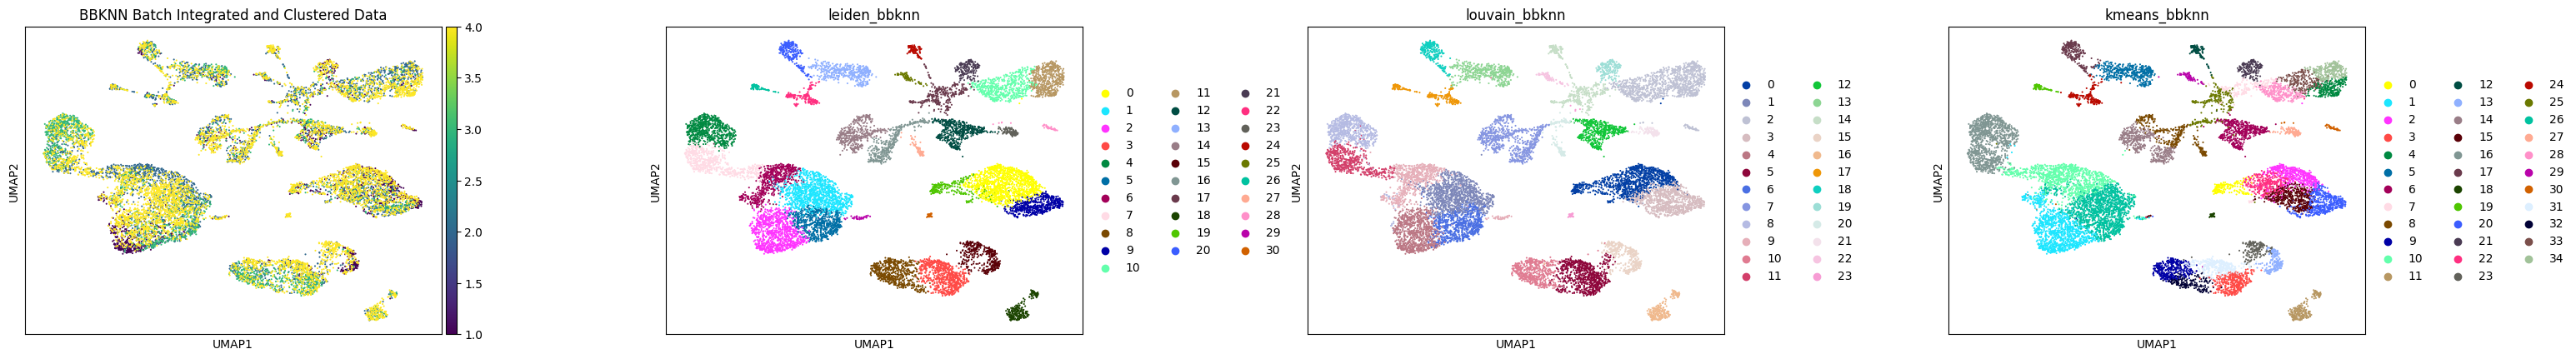

In [28]:
# Install once
!pip install -U bbknn # Use -U to upgrade to the latest version

import bbknn

# Work on a copy of the HVG object
# Ensure adata_hvg is available from previous steps, or load/create it if running this cell independently
if 'adata_hvg' not in locals():
    print("Error: 'adata_hvg' object not found. Please run previous data loading/processing cells.")
else:
    adata_bb = adata_hvg.copy()

    # BBKNN uses existing PCA; builds a batch-corrected neighbor graph
    # Ensure 'batch_key' exists in adata_bb.obs
    if "batch" in adata_bb.obs.columns:
        bbknn.bbknn(adata_bb, batch_key="batch")          # neighbors corrected
        sc.tl.umap(adata_bb)                              # embedding on corrected graph
        sc.tl.leiden(adata_bb, resolution=1.0, key_added="leiden_bbknn")
        sc.tl.louvain(adata_bb, resolution=1.0, key_added="louvain_bbknn", flavor="vtraag")

        # KMeans on (corrected) PCA (optional; keeps kmeans comparable)
        from sklearn.cluster import KMeans
        # Ensure the number of clusters for KMeans is reasonable, e.g., based on a previous clustering
        if "leiden" in adata_hvg.obs.columns:
             n_kmeans = len(adata_hvg.obs["leiden"].cat.categories)
        else:
             n_kmeans = 20 # Fallback default
        print(f"Using n_kmeans={n_kmeans} for KMeans_bbknn")
        adata_bb.obs["kmeans_bbknn"] = KMeans(
            n_clusters=n_kmeans,
            random_state=0
        ).fit_predict(adata_bb.obsm["X_pca"]).astype(str)

        print("\nBBKNN batch integration and clustering complete.")
        # Optional: Display UMAP plot of the BBKNN results
        sc.pl.umap(adata_bb, color=['batch', 'leiden_bbknn', 'louvain_bbknn', 'kmeans_bbknn'],
                   wspace=0.4, title='BBKNN Batch Integrated and Clustered Data')

    else:
        print("Error: 'batch' column not found in adata_bb.obs. Please ensure batch information is loaded.")

## 4.2 Scanorama (embedding integration)

/usr/local/lib/python3.12/dist-packages/scanpy/external/pp/_scanorama_integrate.py:105: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  batch_name = adata.obs[key][idx]


[[0.         0.81314433 0.55219072 0.8382732 ]
 [0.         0.         0.54672897 0.90448581]
 [0.         0.         0.         0.84834325]
 [0.         0.         0.         0.        ]]
Processing datasets 2 <=> 4
Processing datasets 3 <=> 4
Processing datasets 1 <=> 4
Processing datasets 1 <=> 2
Processing datasets 1 <=> 3
Processing datasets 2 <=> 3
Using n_kmeans=35 for KMeans_scano

Scanorama batch integration and clustering complete.


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/usr/local/lib/python3.12/dist-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/usr/local/lib/python3.12/dist-packages/scanpy/plotting

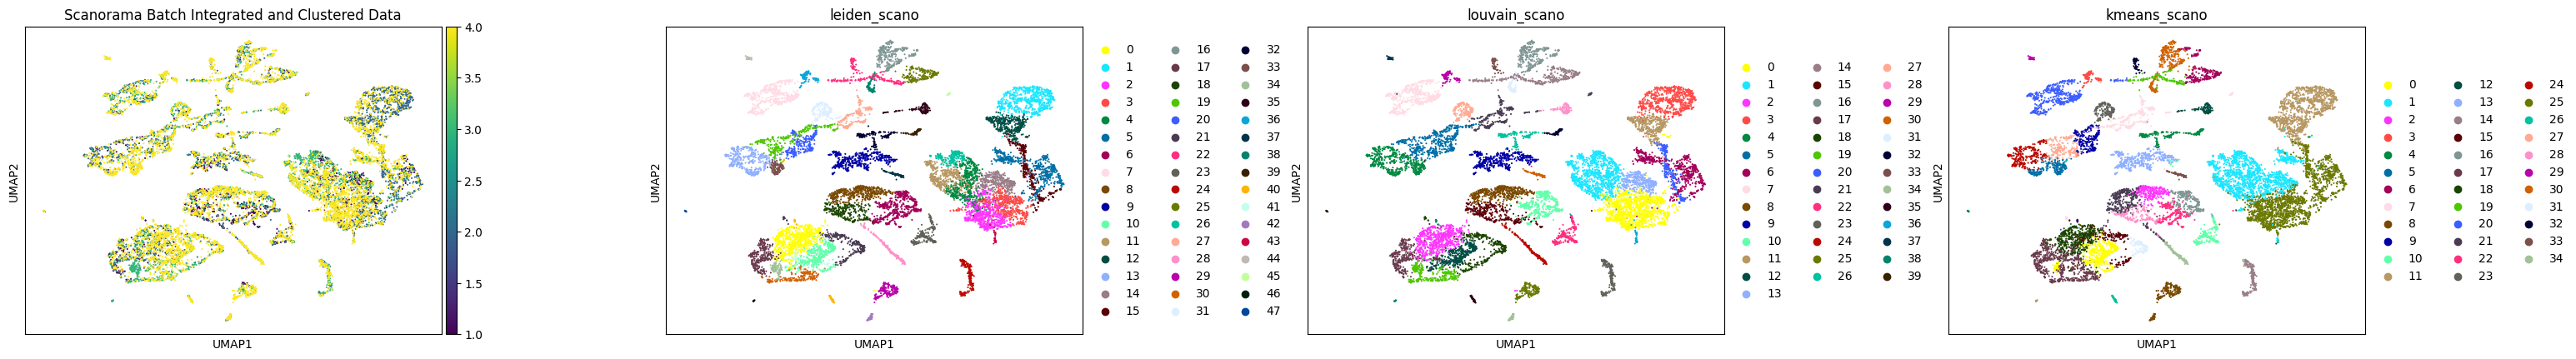

In [30]:
!pip -q install scanorama

import scanpy.external as sce
import scanpy as sc # Ensure scanpy is imported
from sklearn.cluster import KMeans # Ensure KMeans is imported

# Work on a copy
adata_scano = adata_hvg.copy()

# Scanorama requires batches to be contiguous, so sort by batch
adata_scano.obs.sort_values("batch", inplace=True)
adata_scano = adata_scano[adata_scano.obs.index].copy()


# Build batch-wise lists and integrate in-place
sce.pp.scanorama_integrate(adata_scano, key="batch")   # adds corrected X_pca in obsm["X_scanorama"]

# Use the integrated embedding for neighbors/UMAP/clustering
sc.pp.neighbors(adata_scano, use_rep="X_scanorama")
sc.tl.umap(adata_scano)
sc.tl.leiden(adata_scano, resolution=1.0, key_added="leiden_scano")
sc.tl.louvain(adata_scano, resolution=1.0, key_added="louvain_scano", flavor="vtraag")

# Ensure the number of clusters for KMeans is reasonable, e.g., based on a previous clustering
if "leiden" in adata_hvg.obs.columns:
     n_kmeans = len(adata_hvg.obs["leiden"].cat.categories)
else:
     n_kmeans = 20 # Fallback default
print(f"Using n_kmeans={n_kmeans} for KMeans_scano")

adata_scano.obs["kmeans_scano"] = KMeans(
    n_clusters=n_kmeans,
    random_state=0,
    n_init=10 # Add n_init for KMeans
).fit_predict(adata_scano.obsm["X_scanorama"]).astype(str)

print("\nScanorama batch integration and clustering complete.")
# Optional: Display UMAP plot of the Scanorama results
sc.pl.umap(adata_scano, color=['batch', 'leiden_scano', 'louvain_scano', 'kmeans_scano'],
           wspace=0.4, title='Scanorama Batch Integrated and Clustered Data')

## 4.3 Evaluate impact on Clustering (silhouette, ARI, NMI)

In [31]:
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

def sil(ad, key):
    return silhouette_score(ad.obsm["X_umap"], ad.obs[key].astype("category").cat.codes)

rows = []
# BBKNN
rows.append([
    "BBKNN",
    sil(adata_bb, "leiden_bbknn"),
    sil(adata_bb, "louvain_bbknn"),
    sil(adata_bb, "kmeans_bbknn"),
    adjusted_rand_score(adata_hvg.obs["leiden"],  adata_bb.obs["leiden_bbknn"]),
    normalized_mutual_info_score(adata_hvg.obs["leiden"],  adata_bb.obs["leiden_bbknn"]),
    adjusted_rand_score(adata_hvg.obs["louvain"], adata_bb.obs["louvain_bbknn"]),
    normalized_mutual_info_score(adata_hvg.obs["louvain"], adata_bb.obs["louvain_bbknn"]),
    adjusted_rand_score(adata_hvg.obs["kmeans"],  adata_bb.obs["kmeans_bbknn"]),
    normalized_mutual_info_score(adata_hvg.obs["kmeans"],  adata_bb.obs["kmeans_bbknn"]),
])

# Scanorama
rows.append([
    "Scanorama",
    sil(adata_scano, "leiden_scano"),
    sil(adata_scano, "louvain_scano"),
    sil(adata_scano, "kmeans_scano"),
    adjusted_rand_score(adata_hvg.obs["leiden"],  adata_scano.obs["leiden_scano"]),
    normalized_mutual_info_score(adata_hvg.obs["leiden"],  adata_scano.obs["leiden_scano"]),
    adjusted_rand_score(adata_hvg.obs["louvain"], adata_scano.obs["louvain_scano"]),
    normalized_mutual_info_score(adata_hvg.obs["louvain"], adata_scano.obs["louvain_scano"]),
    adjusted_rand_score(adata_hvg.obs["kmeans"],  adata_scano.obs["kmeans_scano"]),
    normalized_mutual_info_score(adata_hvg.obs["kmeans"],  adata_scano.obs["kmeans_scano"]),
])

batch_clust_eval = pd.DataFrame(rows, columns=[
    "method",
    "sil_leiden","sil_louvain","sil_kmeans",
    "ARI_vsBase_leiden","NMI_vsBase_leiden",
    "ARI_vsBase_louvain","NMI_vsBase_louvain",
    "ARI_vsBase_kmeans","NMI_vsBase_kmeans"
])
display(batch_clust_eval)

,method,sil_leiden,sil_louvain,sil_kmeans,ARI_vsBase_leiden,NMI_vsBase_leiden,ARI_vsBase_louvain,NMI_vsBase_louvain,ARI_vsBase_kmeans,NMI_vsBase_kmeans
0,BBKNN,0.426550,0.400795,0.40164,0.773870,0.897655,0.665812,0.846346,0.553714,0.837590
1,Scanorama,0.320814,0.336245,0.32137,0.631513,0.842496,0.716543,0.858609,0.656268,0.850557


## 4.4 Evaluate impact on Marker Selection (ROC cluster = 23)

In [32]:
# If you don't still have markers_base from Section 3/2, recompute quickly:
def roc_markers(adata_in, roc_cluster="23", label_key="leiden", top_n=100):
    # Wilcoxon
    sc.tl.rank_genes_groups(adata_in, groupby=label_key, method="wilcoxon", key_added=f"rgg_w_{label_key}")
    w_df = sc.get.rank_genes_groups_df(adata_in, group=str(roc_cluster), key=f"rgg_w_{label_key}")
    # t-test
    sc.tl.rank_genes_groups(adata_in, groupby=label_key, method="t-test",   key_added=f"rgg_t_{label_key}")
    t_df = sc.get.rank_genes_groups_df(adata_in, group=str(roc_cluster), key=f"rgg_t_{label_key}")
    # T-score (signal-to-noise on HVGs)
    m = adata_in[:, adata_hvg.var_names]
    X = m.X.A if hasattr(m.X, "A") else (m.X.toarray() if hasattr(m.X, "toarray") else m.X)
    mask = (adata_in.obs[label_key].astype(str) == str(roc_cluster)).values
    mu_in,  sd_in  = X[mask].mean(0),  X[mask].std(0) + 1e-6
    mu_out, sd_out = X[~mask].mean(0), X[~mask].std(0) + 1e-6
    import pandas as pd, numpy as np
    tscore = pd.Series((mu_in - mu_out) / np.sqrt(sd_in**2 + sd_out**2), index=m.var_names).sort_values(ascending=False)
    return {
        "wilcoxon": set(w_df.sort_values("scores", ascending=False).head(top_n)["names"]),
        "ttest":    set(t_df.sort_values("scores", ascending=False).head(top_n)["names"]),
        "tscore":   set(tscore.head(top_n).index),
    }

# Baseline markers (from your original object)
markers_base = roc_markers(adata_hvg,   roc_cluster="23", label_key="leiden",        top_n=100)
markers_bb   = roc_markers(adata_bb,    roc_cluster="23", label_key="leiden_bbknn",  top_n=100)
markers_sc   = roc_markers(adata_scano, roc_cluster="23", label_key="leiden_scano",  top_n=100)

def comp(a,b):
    inter = len(a & b); uni = len(a | b); j = inter/uni if uni else 0
    return inter, uni, round(j,3)

rows = []
for method, mk in [("BBKNN", markers_bb), ("Scanorama", markers_sc)]:
    for test in ["wilcoxon","ttest","tscore"]:
        inter, uni, j = comp(markers_base[test], mk[test])
        rows.append([method, test, inter, uni, j])

batch_marker_eval = pd.DataFrame(rows, columns=["method","test","|∩|","|∪|","Jaccard"])
display(batch_marker_eval)

/usr/local/lib/python3.12/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.12/dist-packages/scanpy/tools/_rank_genes_groups.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining

,method,test,|∩|,|∪|,Jaccard
0,BBKNN,wilcoxon,5,195,0.026
1,BBKNN,ttest,13,187,0.070
2,BBKNN,tscore,8,192,0.042
3,Scanorama,wilcoxon,2,198,0.010
4,Scanorama,ttest,11,189,0.058
5,Scanorama,tscore,1,199,0.005
